# Initiation à langgraph

Notion à comprendre : les concepts d'état, de noeuds, d'arrêtes, de messages, ...

L'objectif final est de créer ce workflow/graphe :
- Dire bonjour au lancement du graphe
- tirer un nombre aléatoire entre 1 et 10
- si le nombre est < 3 : 
    - dire un compliment
    - tirer un nouveau nombre et recommencer
- sinon, dire au revoir



# L'état du graphe : State

La première chose à définir est l'état du graphe. Comme son nom l'indique, cela représente l'état du workflow pendant son exécution. On va y stocker toutes les informations nécessaires qui vont être utilisées par les différents noeuds. 

**Et dans le code :**

- Un état est un objet Pydantic, c'est à dire qu'on peut utiliser soit l'objet lui-même, soit le dictionnaire qu'il représente.

- L'état de base (et le plus utilisé) est MessagesState. Il possède une liste nommée "messages" qui permet de stocker l'historique des messages échangés pendant l'éxécution du graphe.

**Info complémentaire :**

- il existe dans langgraph la possibilité de "voyager dans le temps" en stockant les états du graphe.


**Consigne : Définissez un état basé sur MessagesState avec un attribu "nombre" correspondant au dernier nombre tiré par l'agent.**




In [ ]:
from langgraph.graph import MessagesState

# appelez l'état EtatDuGraphe pour que ça soit plus simple pour la suite

# Les noeuds

Dans langgraph, les noeuds sont des fonctions.

En argument de la fonction on retrouve un `State` (venant du noeud précédent).

*Il existe d'autres arguments qu'on ne verra pas pour simplifier l'apprentissage (RunnableConfig, Runtime)*

Les noeuds représentent toute la logique de l'agent : ils sont chargés de traiter les messages, de faire des appels API, de faire des appels à des outils, etc.

Un noeud retourne un nouveau `State` (mis à jour du noeud d'entrée) pour le noeud suivant. On peut retourner : 
- soit l'object `State` directement
- soit la représentation complète sous forme de dictionnaire
- soit la représentation sous forme de dictionnaire avec seulement les éléments mis à jour

**Consigne** :
Implémentez les 3 noeuds suivants : 

- Un noeud qui ajoute un message contenant "Bonjour"
- Un noeud qui tire un nombre aléatoire entre 0 et 10, le stocke, puis ajoute un nouveau message avec ce nombre
- Un noeud qui ajoute un compliment au message

In [ ]:
import random
from langchain.messages import 


def dis_bonjour():
    pass


def tire_nombre():
    pass


def complimente_utilisateur():
     """Complimente l'utilisateur"""
     compliments_disponibles = [
         "Tu es vraiment brillant !",
         "Ton travail est impressionnant !",
         "Tu as un talent incroyable !",
         "Ta créativité est inspirante !",
         "Tu es une personne formidable !",
         "Ton énergie positive est contagieuse !",
         "Tu as un excellent sens de l'humour !",
         "Ta persévérance est admirable !",
         "Tu es quelqu'un de très attentionné !",
         "Ton intelligence brille à chaque instant !"
     ]
     pass

# Construction du workflow

In [ ]:
from langgraph.graph import StateGraph

# Init du graphe
workflow = StateGraph(EtatDuGraphe)

# Ajout des noeuds


# Les arrêtes entre les noeuds

Les arrêtes font les liens entre les noeuds.

On aura des arrêtes simples entre certains noeuds comme entre le noeud `dis_bonjour` et le noeud `tire_nombre`.

On aura des arrêtes conditionnelles entre d'autres noeuds. En effet, quand on a plusieurs noeuds c'est parce qu'on veut que certaines actions ne soient pas toujours exécutées.

Pour créer des embranchements dans notre workflow, on peut utiliser des fonctions conditionnelles.

Il s'agit d'une fonction qui prends en argument le `State` du noeud précédent et qui retourne le nom du noeud suivant.

Le workflow commence par le noeud `START` et termine par le noeud `END`.

On ajoute une arrête avec les fonctions `add_edge` et `add_edge_conditional`.

Une fois les arrêtes ajoutées, le design duworkflow est terminé et il faut le compiler pour récuperer notre graphe final.

In [ ]:

# Fonction de routage conditionnel
def decide_suite():
    """Si nombre > 3 : compliment, sinon : fin"""
    pass


# Ajout des arrêtes
workflow.
# ....
# ....

# Compile
graph = workflow.compile()

# Affichage du graphe

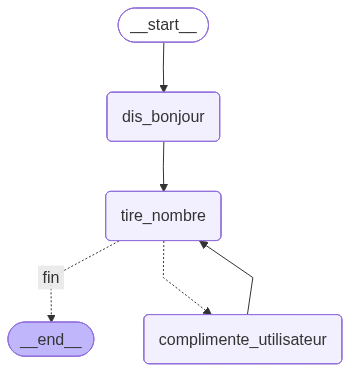


📊 Arêtes du graphe :
  __start__ → dis_bonjour
  complimente_utilisateur → tire_nombre
  dis_bonjour → tire_nombre
  tire_nombre → __end__
  tire_nombre → complimente_utilisateur


In [8]:
from IPython.display import Image, display

# Affichage du graphe
display(Image(graph.get_graph().draw_mermaid_png()))

# Vérification des arêtes
print("\n📊 Arêtes du graphe :")
for edge in graph.get_graph().edges:
    print(f"  {edge.source} → {edge.target}")

In [10]:
# Exécution du graphe
result = graph.invoke({"messages": ["Salut le bot"]})

# Affichage des messages
for message in result["messages"]:
    print(message.pretty_print())

================================ Human Message =================================

Salut le bot
None
================================== Ai Message ==================================

Bonjour Humain !
None
================================== Ai Message ==================================

🎲 Nombre tiré : 7
None
================================== Ai Message ==================================

Tu es vraiment brillant !
None
================================== Ai Message ==================================

🎲 Nombre tiré : 5
None
================================== Ai Message ==================================

Tu es quelqu'un de très attentionné !
None
================================== Ai Message ==================================

🎲 Nombre tiré : 4
None
================================== Ai Message ==================================

Ta créativité est inspirante !
None
================================== Ai Message ==================================

🎲 Nombre tiré : 10
None
===================